# Fraud Detection in Crypto (ETH Blockchain)  
Dataset Link: https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset/code

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('final.csv')

df.head()

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type,received_higher_sent,ERC20_received_higher_sent
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire,1,0
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token,1,1
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,0,XENON,0,1
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON,1,1
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS,1,1


## Correlation Relationship

In [3]:
def cor_matrix(data):
    # Compute the correlation matrix of numeric columns
    corr = data.select_dtypes(include='number').corr()

    # Create mask to hide upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up matplotlib figure
    plt.figure(figsize=(15,15))

    # Customize seaborn heatmap
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, cbar_kws={'shrink':0.8})

    # Rotate x-axis labels
    plt.xticks(rotation=80)

    # Set plot title
    plt.title("Correlation Matrix", fontsize=20)

    plt.show()

In [4]:
def corelated(data, target_col, threshold):
    """
    Finds columns in `data` with correlation >= threshold (absolute) with the target column.

    Parameters:
    - data: pandas DataFrame
    - target_col: string, name of the column to compare against
    - threshold: float, minimum absolute correlation to include

    Returns:
    - pandas Series: correlation values sorted by strength
    """
    # Select numeric columns only
    numeric_data = data.select_dtypes(include='number')

    # Check if the target column is numeric and in the DataFrame
    if target_col not in numeric_data.columns:
        raise ValueError(f"'{target_col}' must be a numeric column in the DataFrame")

    # Compute correlation with target column
    corrs = numeric_data.corrwith(numeric_data[target_col])

    # Filter based on threshold
    result = corrs[abs(corrs) >= threshold].drop(labels=[target_col])

    return result.sort_values(ascending=False)

In [5]:
def get_high_corr_pairs(df, threshold=0.3):
    # Only use numeric columns
    corr_matrix = df.select_dtypes(include='number').corr()

    # Unstack the matrix to get pairs
    corr_unstacked = corr_matrix.abs().unstack()

    # Filter pairs above threshold but remove self-correlation (value = 1)
    high_corr_pairs = corr_unstacked[
        (corr_unstacked > threshold) & (corr_unstacked < 1)
    ].drop_duplicates()

    return high_corr_pairs.sort_values(ascending=False)


In [6]:
corelated(df, 'FLAG', 0.05)

/Users/duyenle/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/duyenle/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


ERC20_received_higher_sent                              0.179536
ERC20 uniq rec contract addr                           -0.061890
ERC20 uniq rec token name                              -0.062344
avg val sent                                           -0.063355
Sent tnx                                               -0.078190
Received Tnx                                           -0.079536
total transactions (including tnx to create contract   -0.100551
Avg min between received tnx                           -0.118640
Time Diff between first and last (Mins)                -0.269612
received_higher_sent                                   -0.445771
dtype: float64

In [7]:
def drop_highly_correlated_features(df, threshold=0.8):
    # Step 1: Compute correlation matrix (absolute values)
    corr_matrix = df.select_dtypes(include='number').corr().abs()

    # Step 2: Get upper triangle of the matrix (no duplicates or self-correlations)
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )

    # Step 3: Find pairs above threshold
    to_drop = set()
    for col in upper.columns:
        for row in upper.index:
            if upper.loc[row, col] > threshold:
                # Drop col if not already dropped; otherwise skip
                if col not in to_drop and row not in to_drop:
                    to_drop.add(col)

    # Step 4: Drop selected columns
    reduced_df = df.drop(columns=to_drop)

    return reduced_df, list(to_drop)

## ML models Comparision

In [8]:
from pycaret.classification import *

In [9]:
setup(df,target="FLAG",session_id=85)

,Description,Value
0,Session id,85
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(9816, 51)"
4,Transformed data shape,"(9816, 51)"
5,Transformed train set shape,"(6871, 51)"
6,Transformed test set shape,"(2945, 51)"
7,Numeric features,47
8,Categorical features,3
9,Preprocess,True


In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8988,0.9112,0.5442,1.0000,0.7042,0.6496,0.6937,0.0530
knn,K Neighbors Classifier,0.8936,0.9040,0.7095,0.7904,0.7472,0.6801,0.6821,0.0390
rf,Random Forest Classifier,0.8300,0.9843,0.2343,1.0000,0.3635,0.3133,0.4253,0.0890
lr,Logistic Regression,0.7829,0.7740,0.0256,0.4192,0.0469,0.0362,0.0799,0.4120
dt,Decision Tree Classifier,0.7781,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0210
ridge,Ridge Classifier,0.7781,0.9530,0.0007,0.1000,0.0013,0.0007,0.0051,0.0230
ada,Ada Boost Classifier,0.7781,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0230
gbc,Gradient Boosting Classifier,0.7781,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2300
lda,Linear Discriminant Analysis,0.7781,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0370
xgboost,Extreme Gradient Boosting,0.7781,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0430


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=85, verbose=0,
                     warm_start=False)

In [11]:
check = df.iloc[:,1:].select_dtypes(include = ['number'])
no_var = check.var() == 0 
zero_var_cols = check.columns[no_var]

In [12]:
#Drop features with Variance = 0
data = df.drop(columns = zero_var_cols)
data.shape

(9816, 44)

In [13]:
data_, dropped_cols = drop_highly_correlated_features(data, threshold=0.5)
data_.shape

(9816, 26)

In [14]:
num_data = data_.select_dtypes(include = ['number'])
num_data.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,min value received,max value received,min val sent,...,total Ether sent,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,received_higher_sent,ERC20_received_higher_sent
0,0,844.26,1093.71,704785.63,721,89,0,0.000000,45.806785,0.00,...,865.691093,265.0,3.558854e+07,3.560317e+07,0.0,0.0,58.0,0.0,1,0
1,0,12709.07,2958.44,1218216.73,94,8,0,0.000000,2.613269,0.00,...,3.087297,8.0,4.034283e+02,2.260809e+00,0.0,0.0,7.0,0.0,1,1
2,0,246194.54,2434.02,516729.30,2,10,0,0.113119,1.165453,0.05,...,3.588616,8.0,5.215121e+02,0.000000e+00,0.0,0.0,8.0,0.0,0,1
3,0,10219.60,15785.09,397555.90,25,9,0,0.000000,500.000000,0.00,...,1750.045862,14.0,1.711105e+04,1.141223e+04,0.0,0.0,11.0,0.0,1,1
4,0,36.61,10707.77,382472.42,4598,20,1,0.000000,12.802411,0.00,...,104.318883,42.0,1.628297e+05,1.235399e+05,0.0,0.0,27.0,0.0,1,1


In [15]:
# Drop features that have mostly 0s
drop = []
for i in num_data.columns[1:]:
    if len(num_data[i].value_counts()) < 10:
        drop.append(i)
        print(df[i].value_counts())
        print('------------------')

min value sent to contract
0.00    9814
0.02       1
0.01       1
Name: count, dtype: int64
------------------
max val sent to contract
0.000000    9813
0.020000       1
0.010000       1
0.046029       1
Name: count, dtype: int64
------------------
ERC20 uniq sent addr.1
0.0    9788
1.0      26
3.0       1
2.0       1
Name: count, dtype: int64
------------------
received_higher_sent
1    6646
0    3170
Name: count, dtype: int64
------------------
ERC20_received_higher_sent
0    5619
1    4197
Name: count, dtype: int64
------------------


In [16]:
drop = ['min value sent to contract',
 'max val sent to contract',
 'ERC20 uniq sent addr.1']

In [17]:
num_data.drop(columns=drop, inplace = True)
feature = num_data.columns[1:]
print(feature)

Index(['Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'min value received',
       'max value received ', 'min val sent', 'max val sent',
       'total Ether sent', 'Total ERC20 tnxs', 'ERC20 total Ether received',
       'ERC20 total ether sent', 'ERC20 total Ether sent contract',
       'ERC20 uniq rec contract addr', 'ERC20 min val rec',
       'received_higher_sent', 'ERC20_received_higher_sent'],
      dtype='object')


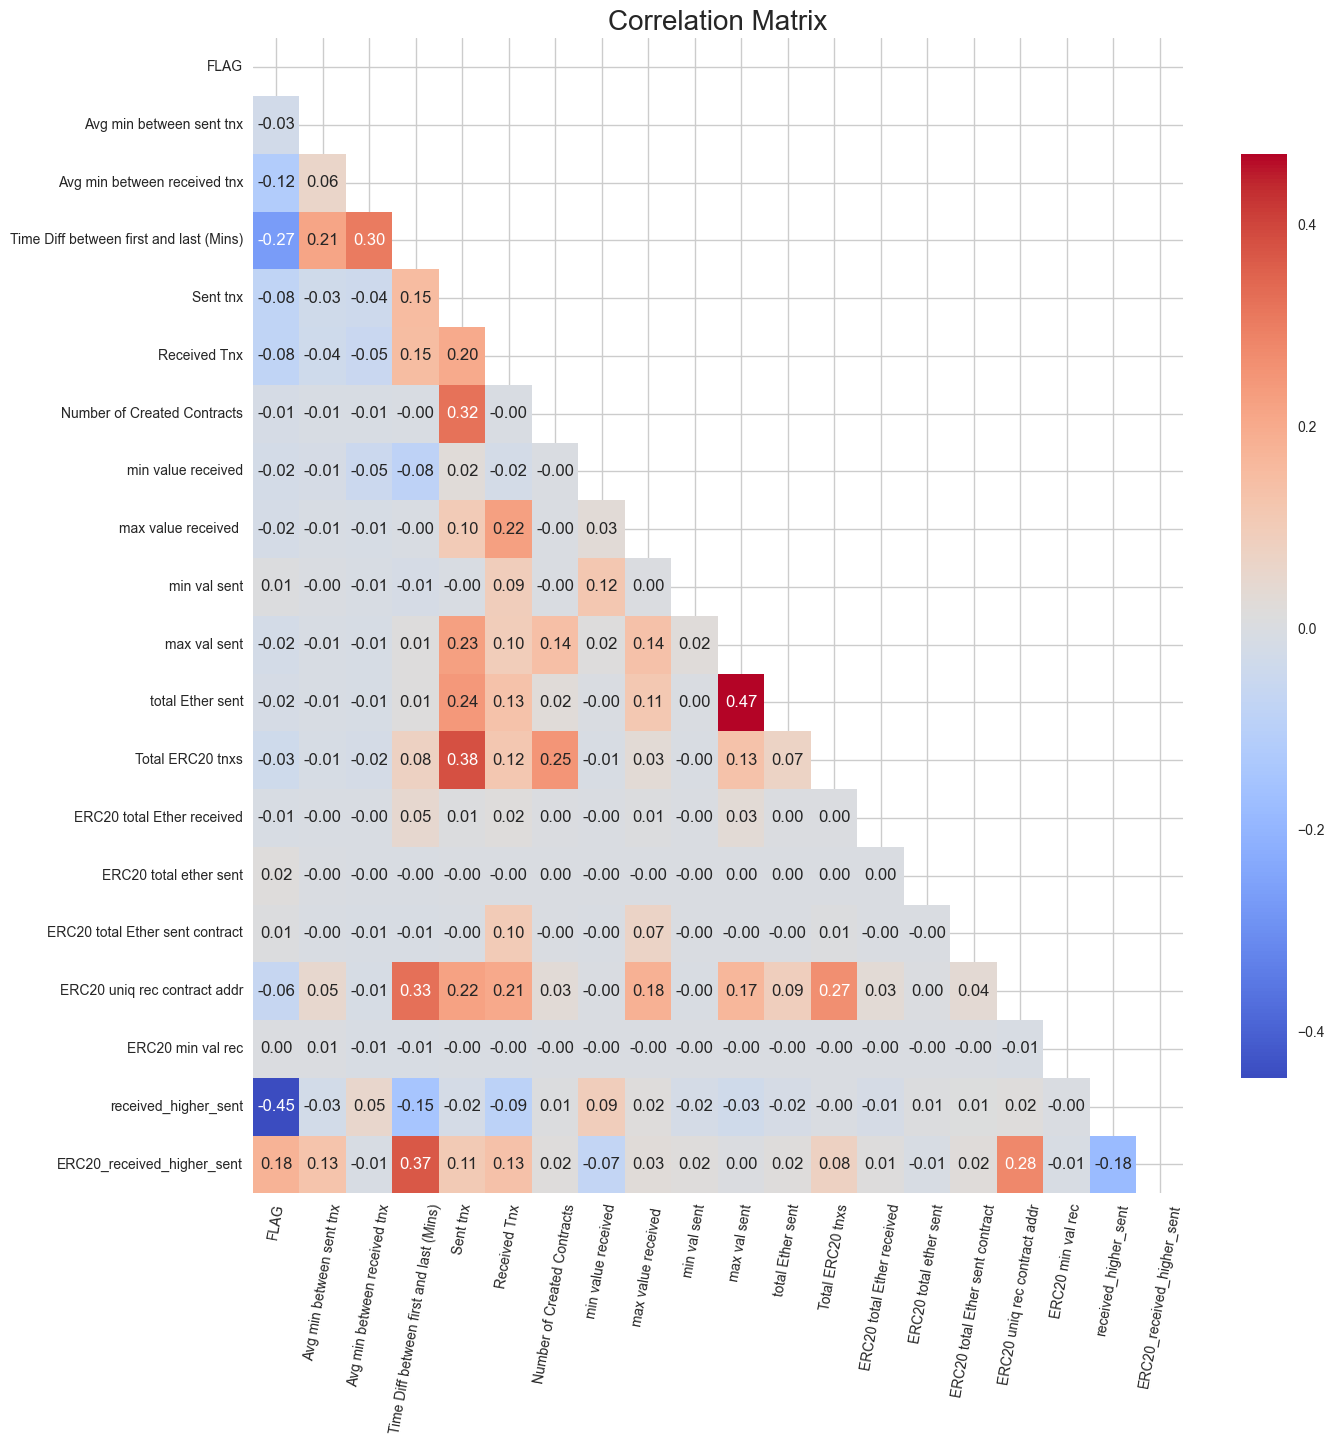

In [18]:
cor_matrix(num_data)

## Predictive Model

Class 1 represents the minority class (~22%), which could lead the model to favor predicting Class 0. To address this imbalance, SMOTE (Synthetic Minority Over-sampling Technique) should be applied to resample the training data and ensure better representation of the minority class during model learning.

In [19]:
X = num_data[feature]
y = num_data['FLAG']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def model(X, y, pipeline):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test,y_pred))


    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix: \n{cm}')
    print('\n')

    # Predict on training data
    y_train_pred = pipeline.predict(X_train)

    # Accuracy scores
    print(f"Training accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Test accuracy:     {accuracy_score(y_test, y_pred):.4f}")

    #Predict probabilities
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="red")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve")
    plt.legend(loc = 'lower right')
    plt.show()

### KNN

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1528
           1       0.75      0.86      0.80       436

    accuracy                           0.91      1964
   macro avg       0.86      0.89      0.87      1964
weighted avg       0.91      0.91      0.91      1964

Confusion Matrix: 
[[1406  122]
 [  62  374]]


Training accuracy: 0.9293
Test accuracy:     0.9063


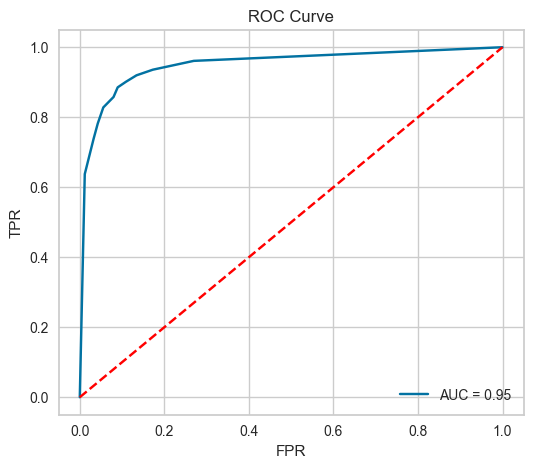

In [21]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=10))
])

model(X,y,pipeline)

### Logistic Regression

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1528
           1       0.71      0.81      0.75       436

    accuracy                           0.88      1964
   macro avg       0.82      0.86      0.84      1964
weighted avg       0.89      0.88      0.89      1964

Confusion Matrix: 
[[1382  146]
 [  84  352]]


Training accuracy: 0.8903
Test accuracy:     0.8829


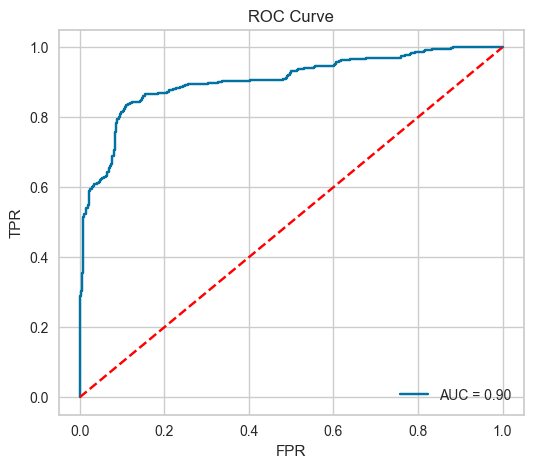

In [22]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([('smote', SMOTE(random_state=42)),
                     ('scaler', StandardScaler()),
                     ('lr', LogisticRegression(max_iter=1000))])

model(X,y,pipeline)

### Random Forest

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1528
           1       0.89      0.85      0.87       436

    accuracy                           0.95      1964
   macro avg       0.93      0.91      0.92      1964
weighted avg       0.94      0.95      0.94      1964

Confusion Matrix: 
[[1484   44]
 [  64  372]]


Training accuracy: 0.9999
Test accuracy:     0.9450


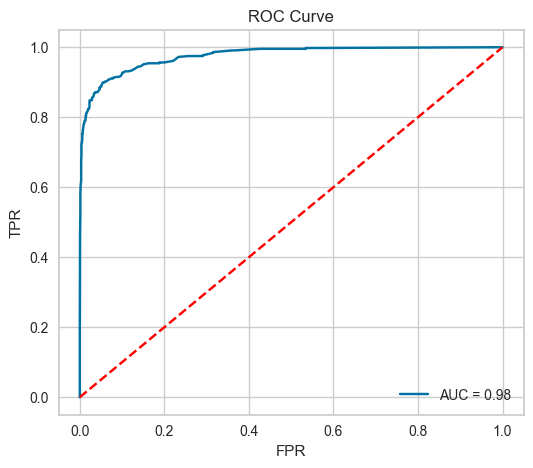

In [23]:
from sklearn.ensemble import RandomForestClassifier 

pipeline = Pipeline([('smote', SMOTE(random_state=42)),
                     ('scaler', StandardScaler()),
                     ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

model(X,y,pipeline)


### XGBoost
XGBoost achieved the test accuracy of 95%, demonstrating strong overall performance in classifying both fraudulent and non-fraudulent cases.

Based on a test dataset of 1,964 samples:

* Out of 436 actual fraud cases, the model correctly identified 373 cases, achieving a recall of 86%.

* Out of 416 predicted fraud cases, 373 were correct, yielding a precision of 90%.

An AUC (Area Under the ROC Curve) of 0.98 indicates that the model is highly effective at distinguishing between the two classes, suggesting near-perfect separability between fraudulent and non-fraudulent transactions.

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1528
           1       0.90      0.86      0.88       436

    accuracy                           0.95      1964
   macro avg       0.93      0.91      0.92      1964
weighted avg       0.95      0.95      0.95      1964

Confusion Matrix: 
[[1485   43]
 [  63  373]]


Training accuracy: 0.9955
Test accuracy:     0.9460


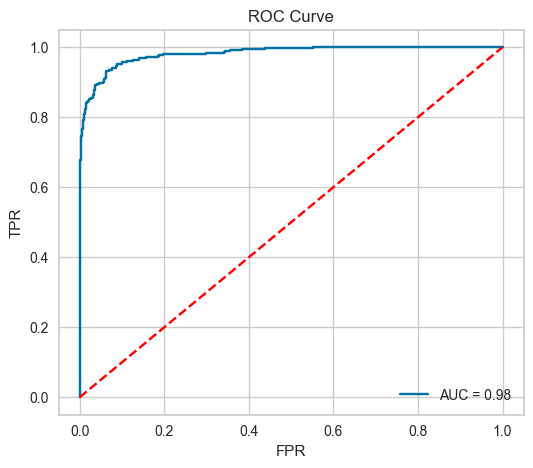

In [24]:
from xgboost import XGBClassifier

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()), 
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

model(X, y, pipeline)  

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # or your model

model = RandomForestClassifier()
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # use 'roc_auc' for AUC

print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [0.95264766 0.95313296 0.95618951 0.95873663 0.95058584]
Mean CV Accuracy: 0.9542585178137706


### Logistic Regression with Interpretation

In [26]:
logit_data = num_data

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn import metrics
import statsmodels.api as sm

pd.set_option('display.float_format', '{:,.6f}'.format)

X = logit_data[feature]
y = logit_data['FLAG']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

#Logistic Model
log_model = sm.Logit(y_train,X_train).fit()
print(log_model.summary())

#Predictation on test data
y_pred = log_model.predict(X_test)
    

Optimization terminated successfully.
         Current function value: 0.277631
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                   FLAG   No. Observations:                 7852
Model:                          Logit   Df Residuals:                     7832
Method:                           MLE   Df Model:                           19
Date:                Mon, 30 Jun 2025   Pseudo R-squ.:                  0.4716
Time:                        14:16:44   Log-Likelihood:                -2180.0
converged:                       True   LL-Null:                       -4125.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.817

The Pseudo R-squared of 0.4716 indicates that the model explains ~47% of the variation in the target variable. This is considered a strong fit for classification problems involving behavioral or fraud detection data.

#### 🔝 Top 10 Significant Features Impacting Suspicious Flag
| Feature                                   | Coefficient    | Direction | Interpretation                                                                                                                     |
| ----------------------------------------- | -------------- | --------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| `received_higher_sent`                    | **-3.0399**    | ↓         | Addresses that receive more Ether than they send are **much less likely** to be flagged. Indicates legitimate accumulation.        |
| `ERC20_received_higher_sent`              | **2.1437**     | ↑         | Receiving more ERC20 tokens than sending is **strongly associated** with being flagged. May reflect malicious collection behavior. |
| `Time Diff between first and last (Mins)` | **-1.101e-05** | ↓         | Longer active duration **reduces** the chance of being flagged — fraudulent wallets often have short lifespans.                    |
| `ERC20 uniq rec contract addr`            | **0.0530**     | ↑         | More unique ERC20 receiving contract addresses **increase** the odds of being flagged. May reflect opportunistic or bot behavior.  |
| `Avg min between sent tnx`                | **1.178e-05**  | ↑         | Longer gaps between sent transactions are **linked to higher risk** — suggesting inactivity or bursts of malicious activity.       |
| `Sent tnx`                                | **-0.0090**    | ↓         | More outgoing transactions **decrease** the risk — reflects active, legitimate behavior.                                           |
| `max val sent`                            | **-0.0008**    | ↓         | Higher maximum sent values are **associated with lower** risk — possibly large, legitimate transfers.                              |
| `Total ERC20 tnxs`                        | **-0.0024**    | ↓         | More ERC20 transactions **reduce** the likelihood of being flagged. Likely reflects legitimate trading behavior.                   |
| `Received Tnx`                            | **-0.0004**    | ↓         | Higher number of received transactions **lowers** risk — shows network activity.                                                   |
| `ERC20 total Ether received`              | **2.717e-11**  | ↑         | A small but positive effect — more ERC20 token value received correlates with a **slightly higher** chance of being flagged.       |


In [28]:
#Confusion Matrix
X_test= X_test.copy()
X_test.loc[:,'prediction']=0
X_test.loc[y_pred>0.5 ,'prediction']=1
print("\nConfusion Matrix: \n", confusion_matrix(y_test,X_test['prediction']))
print("\n",classification_report(y_test,X_test['prediction'],digits=3))


Confusion Matrix: 
 [[1414   89]
 [ 144  317]]

               precision    recall  f1-score   support

           0      0.908     0.941     0.924      1503
           1      0.781     0.688     0.731       461

    accuracy                          0.881      1964
   macro avg      0.844     0.814     0.828      1964
weighted avg      0.878     0.881     0.879      1964

